In [76]:
import pandas as pd
import os
import inspect


# Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz



# checking files for renaming 

In [18]:

script_directory = os.path.dirname(os.path.abspath(
inspect.getfile(inspect.currentframe())))

print(script_directory)
print("File location using os.getcwd():", os.getcwd())


C:\Users\ambreen.hanif\AppData\Local\Temp\ipykernel_37400
File location using os.getcwd(): c:\Users\ambreen.hanif\Github\slr_project\experiments\churn


In [34]:
def rename_files(file):
    file = file.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_").replace(":", "_").replace(",", "_")
    return file.lower()


In [41]:

# print(os.chdir())
# os.chdir
path = '../../data/churn_examples/'
files = os.listdir(path)
print(files)


for index, file in enumerate(files):
    new_name = rename_files(file)
    print(new_name)
    os.rename(os.path.join(path, file), os.path.join(path, new_name))

['Bank Customer Churn Prediction.csv', 'e_commerce_dataset.xlsx', 'telecom_customer_churn.csv', 'telecom_data_dictionary.csv', 'telecom_zipcode_population.csv']
bank_customer_churn_prediction.csv
e_commerce_dataset.xlsx
telecom_customer_churn.csv
telecom_data_dictionary.csv
telecom_zipcode_population.csv


In [42]:
bank_data = pd.read_csv('../../data/churn_examples/bank_customer_churn_prediction.csv')

In [43]:
bank_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [49]:
le = LabelEncoder()

bank_data['country']   = le.fit_transform(bank_data['country'])
bank_data['gender'] = le.fit_transform(bank_data['gender'])
bank_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [53]:
X = bank_data.drop('churn', axis=1)
y = bank_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred = rf.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

Accuracy 0.868


In [61]:
dot = graphviz.Digraph(comment='The Round Table')

In [77]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [70]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024746E43650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002472AEF4C10>})

In [71]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 60}


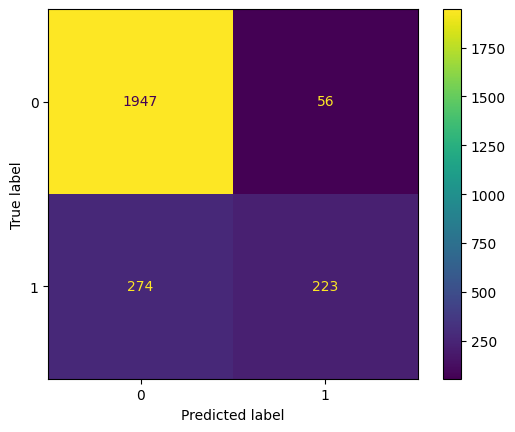

In [72]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [80]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.868
Precision: 0.7992831541218638
Recall: 0.448692152917505


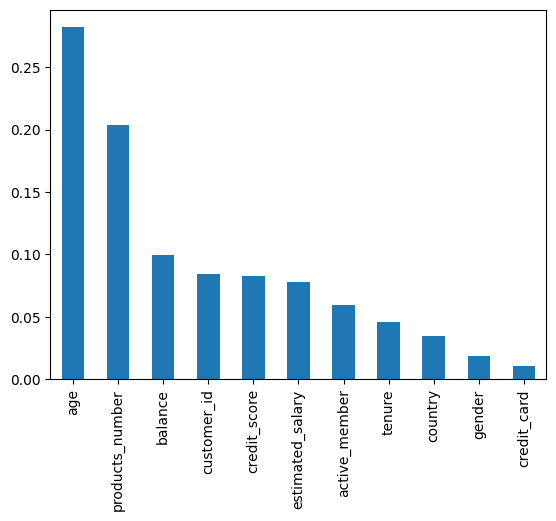

In [75]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [81]:
display(y_test)

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
4862    0
7025    1
7647    0
7161    0
73      0
Name: churn, Length: 2500, dtype: int64

In [82]:
display(y_pred)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:

print(np.where(y_test==1)[0])

[   7   10   11   12   22   25   35   36   40   41   44   48   53   54
   68   72   82   85   87   91   95   97  100  101  106  109  111  113
  118  120  126  147  152  154  155  162  172  183  184  195  203  205
  207  212  215  218  220  231  233  238  244  249  253  260  261  269
  275  281  284  288  292  295  299  300  309  310  320  321  322  324
  327  339  348  363  376  386  390  392  393  407  409  411  420  426
  429  439  448  456  457  468  472  477  482  483  484  494  500  504
  506  513  518  524  526  535  537  543  544  552  556  559  561  566
  568  569  572  575  577  578  581  582  588  595  597  599  617  622
  633  636  638  644  650  657  669  670  677  679  698  701  720  727
  728  730  732  742  744  745  754  761  767  768  775  776  779  786
  790  794  795  796  799  803  808  824  832  844  853  864  868  882
  897  899  909  913  914  917  919  920  921  929  931  934  948  949
  958  964  966  968  970  976  987  989  995 1003 1007 1014 1015 1016
 1026 

In [150]:
# X_test[(y_pred == 1) & (y_test == 0)]  # False Positives
FPos_test = X_test[(y_pred == 0) & (y_test == 1)]   # False Negatives

In [153]:
TPos_test = X_test[(y_pred == 1) & (y_test == 1)]  # True Positives

In [151]:
FPos_test.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
5202,15713354,597,1,0,22,6,101528.61,1,1,0,70529.00
4640,15696373,687,0,0,44,9,0.00,2,0,0,103042.20
5589,15588372,715,1,0,37,9,105489.31,1,0,0,143096.49
5547,15713845,688,0,1,38,7,148045.68,1,1,0,175479.92
9317,15585249,741,0,1,42,6,106036.52,1,1,0,194686.78


In [128]:
X_test[(y_test == 1) & (y_pred[:,0]==0)]
# X_test[(y_test == 0) & (y_pred[0].T == 1)]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [90]:
for i in range(0,len(y_test)):
    if (y_test.iloc[i]==1 and y_pred[i]==0):
        print("Actual:", y_test.iloc[i], "Predicted:", y_pred[i])

Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 Predicted: 0
Actual: 1 P